#### Importing dependencies and packages

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier

##### Data collection and preprocessing 


In [2]:
# loading the csv data using pandas 
heart_data=pd.read_csv('heart.csv')

In [3]:
#print first five rows 
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#statistical measure for the data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#checking for null or missing values 
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#mean values for all features group by target varaible 

heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [9]:
#checking for class imbalance in the data 
#1> defective heart
# 2> normal heart
heart_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

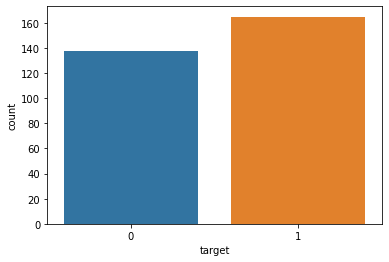

In [53]:
 sns.countplot(x="target",data=heart_data)

<AxesSubplot:xlabel='sex', ylabel='count'>

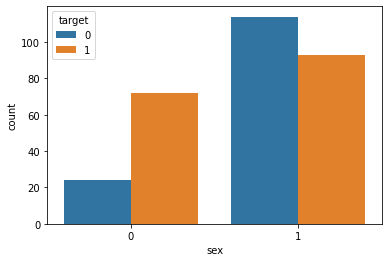

In [54]:
sns.countplot(x="sex", hue="target", data=heart_data)

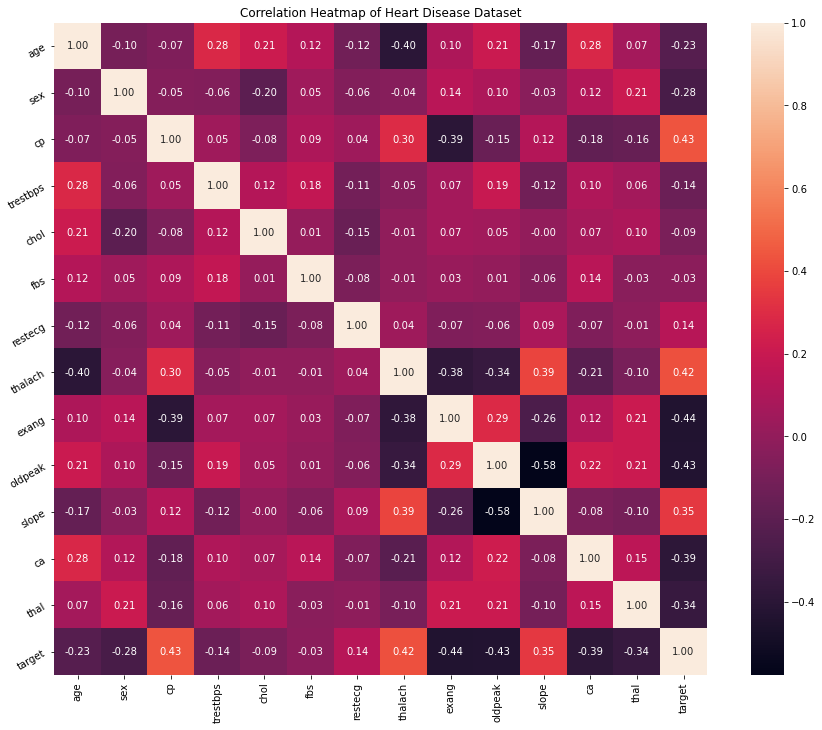

In [56]:
import matplotlib.pyplot as plt
#correlation plot
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(heart_data.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

##### Splitting the target variables and features

In [10]:
X= heart_data.drop(columns='target',axis=1)
Y=heart_data['target']

#### Splitting the training and test data

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


##### Logistic Regression modelling

In [17]:
#training the logsitic regression model with training data 
logRegModel= LogisticRegression(solver='liblinear')
logRegModel.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [21]:
# training accuracy 
X_train_prediction=logRegModel.predict(X_train)

In [22]:
print(accuracy_score(X_train_prediction,Y_train))

0.859504132231405


In [23]:
#test accuracy

X_test_prediction=logRegModel.predict(X_test)

In [24]:
print(accuracy_score(X_test_prediction,Y_test))

0.8360655737704918


###### Using ANN

In [27]:
#importing KERAS and associated libraries
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [28]:
# standardizing the data before sending it to neural network 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
SX_train=sc.fit_transform(X_train)
SX_test=sc.transform(X_test)

In [29]:
annclassfier=Sequential()


In [49]:
#Adding the inputr layer and the first hidden layer 

annclassfier.add(Dense(units=16, activation='relu'))
#adding the second hidden layer
annclassfier.add(Dense(units=8, activation='relu'))
# Adding the output layer
annclassfier.add(Dense(units=1, activation='sigmoid'))

# Compiling the ANN
annclassfier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
annclassfier.fit(SX_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6515 - accuracy: 0.5455
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.5455
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.5455
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.5455
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.5455
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.5455
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.5455
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5820 - accuracy: 0.5455
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.5455
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.5455
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.2829 - accuracy: 0.9628
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.9628
Epoch 86/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2808 - accuracy: 0.9628
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2798 - accuracy: 0.9628
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2788 - accuracy: 0.9628
Epoch 89/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2778 - accuracy: 0.9628
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2769 - accuracy: 0.9628
Epoch 91/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2758 - accuracy: 0.9628
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2748 - accuracy: 0.9628
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2739 - accuracy: 0.9628
Epoch 94/100
8/8 [===============

In [51]:
X_testann_prediction=annclassfier.predict(SX_test)

In [52]:
print(accuracy_score(X_testann_prediction.round(),Y_test))

0.819672131147541


#### Making predictive system

In [26]:
input_data=(70,1,1,120,275,0,0,103,0,1.4,1,1,3)
##changing the input data to numpy array
input_data_as_numpy=np.asarray(input_data)

# rehsape np array as we are predicting for the one instance 
input_data_reshape=input_data_as_numpy.reshape(1,-1)
prediction=logRegModel.predict(input_data_reshape)
if(prediction[0]==0):
    print("NO heart disease")
else :
    print("You have heart disease")

NO heart disease
